<a href="https://colab.research.google.com/github/Pataweepr/ComEngMath2/blob/master/(ComEngMath2)Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

## Problem 1
กำลังหาอยู่

[link data](https://drive.google.com/file/d/1geQ4L6aUOQUSOCwl2UvDl5dgn_ocLFg1/view?usp=sharing)

## Problem 2
analysis sound


## Problem 3
Prove Aliasing



## Problem 4 (sound)
Filter แบบง่าย optional

## Problem 5 (image)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
!unzip '/content/gdrive/My Drive/data2.zip'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/
Archive:  /content/gdrive/My Drive/data2.zip
   creating: ComEngMath2_data/
  inflating: ComEngMath2_data/72475__rockwehrmann__glissup02.wav  
  inflating: __MACOSX/ComEngMath2_data/._72475__rockwehrmann__glissup02.wav  
  inflating: ComEngMath2_data/kid_03_normal.wav  
  inflating: __MACOSX/ComEngMath2_data/._kid_03_normal.wav  
  inflating: ComEngMath2_data/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/._.DS_Store  
  inflating: ComEngMath2_data/21276

In [4]:
!ls ComEngMath2_data/hamtaro0.jpg

100475__iluppai__saxophone-weep.wav
105977__wcfl10__favorite-station.wav
120994__thirsk__120-oboe.wav
132736__ciccarelli__ocean-waves.wav
18871__zippi1__sound-bell-440hz.wav
212764__qubodup__lion-roar.flac
24965__www-bonson-ca__bigdogbarking-02.wav
253887__themusicalnomad__positive-beeps.wav
439520__inspectorj__green-toy-pig-squeaking-a.wav
470767__oorlab__fieldrecording-howling-cats-may2018.wav
72475__rockwehrmann__glissup02.wav
87778__marcgascon7__vocals.wav
92002__jcveliz__violin-origional.wav
adult_01_normal.wav
hamtaro0.jpg
kid_01_normal.wav
kid_02_normal.wav
kid_03_normal.wav
kid_04_normal.wav
kid_05_normal.wav


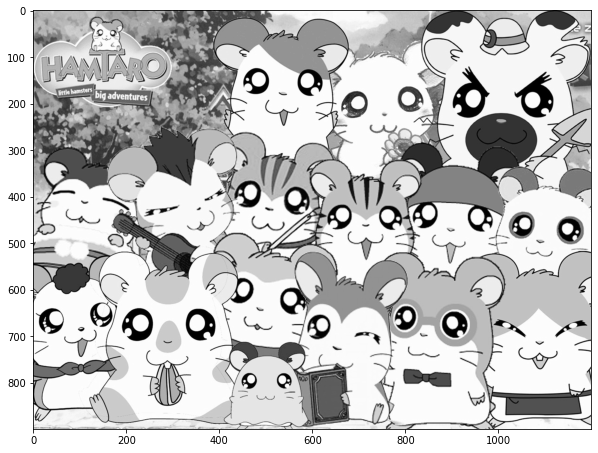

In [6]:
diag_line = np.array([[ 2, -1, -1],
                    [-1, 2, -1],
                    [-1, -1, 2]])
screen_shot = cv2.imread('ComEngMath2_data/hamtaro0.jpg',0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

# grad = signal.convolve2d(screen_shot,diag_line,boundary='symm',mode='same')

# plt.figure(figsize=(10,10))
# plt.imshow(grad, cmap='gray')
# plt.show()

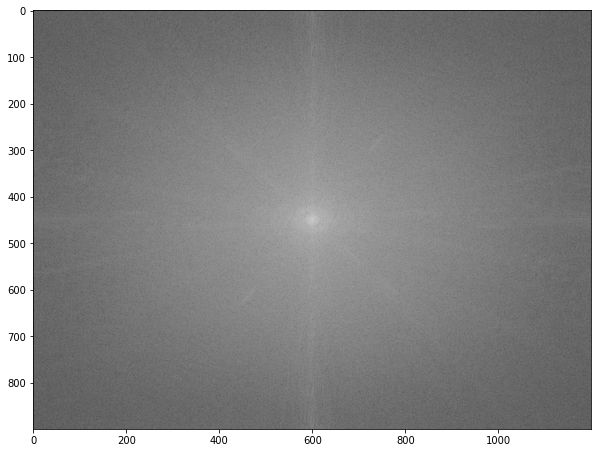

In [8]:
# screen_shot

F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

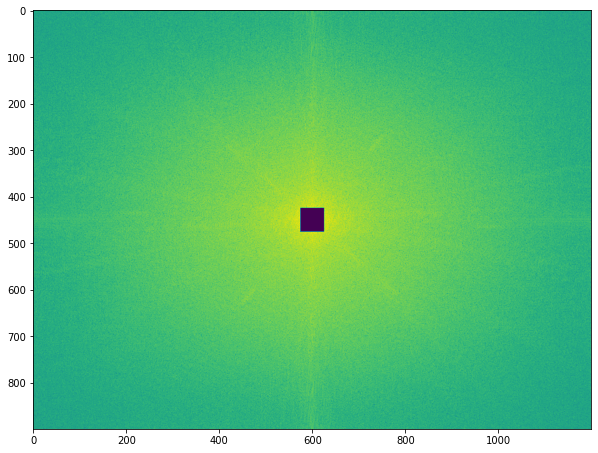

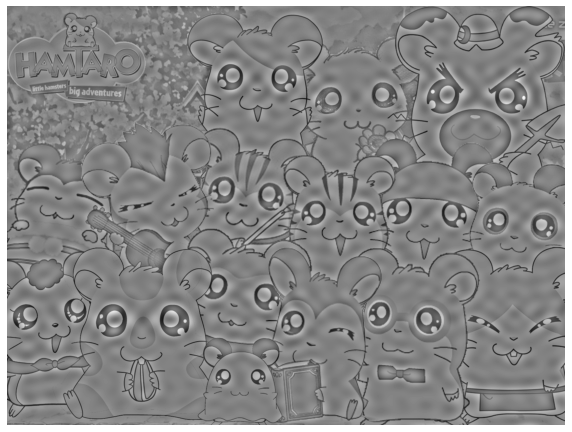

In [10]:
(w, h) = screen_shot.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 25
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int))
plt.show()

im1 = fftpack.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

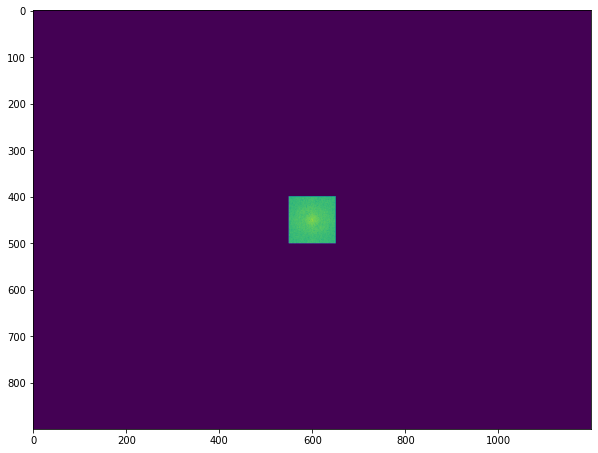

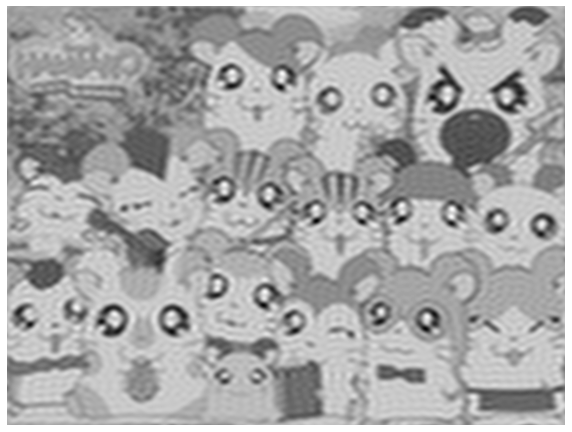

In [11]:
# F1 = fftpack.fft2((im).astype(float))
F2_2 = fftpack.fftshift(F1) # FFT center zeros freq
F2_new = np.zeros_like(F2_2)

# high pass filter
n = 50
F2_new[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = F2_2[half_w-n:half_w+n+1,half_h-n:half_h+n+1]

# select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2_new))).astype(int))
plt.show()

im2 = fftpack.ifft2(fftpack.ifftshift(F2_new)).real
plt.figure(figsize=(10,10))
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.show()